In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits
import warnings
warnings.filterwarnings("ignore")

In [13]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
dc_major = data.field('DC_maj')
lgz = data.field('LGZ_size')
LGZ = array(lgz)
DC = array(dc_major)

In [4]:
#### NEW ELEMENTS
U = data.field('gFApMag')
u = array(U)
W1 = data.field('w1Mag')
W2 = data.field('w2Mag')
W3 = data.field('w3Mag')


In [9]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24)

def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P

Pw = power(Lum_d,flux_tot,z)
P_low_f = Pw*1e-7

In [52]:
## Vega Correction

W1_mag = array(W1-2.699)
W2_mag  = array(W2-3.339)
W3_mag = array(W3-5.174)
u_mag = array(U-6.620)

In [358]:
diff1 = array(W1_mag-W2_mag)
diff2 = array(W2_mag- W3_mag)
diff3 = array(U-W3)

Tot_sources = np.vstack((P_low_f,z,diff1,diff2,diff3,x1,x2,x3,DC,LGZ)).T

# W1-W2 & W2-W3

In [395]:
x1 = (0.315*diff2)-0.222
x3 = (0.315*diff2)+0.796
x2 = (-3.172*diff2)+7.624
 

In [396]:
hergs = Tot_sources[(diff1 >= 0.5)]
LERGs  = Tot_sources[(diff1 < 0.5)]
Tot_sources.shape

(36906, 10)

In [397]:
#Limit1 = Tot_sources [(diff1 < x1)]
Limit1 = Tot_sources [(diff1 > x1)]
Limit3 = Tot_sources [(diff2 >= 2.157)]
Limit2 = Tot_sources[diff1> x2]
Limit4 = Tot_sources[(diff1 >= 0.5)]

HERGs = Tot_sources[(diff1>=x1) & (diff1>0.5) & (diff2 >= 2.157) & (diff1>=x2)]

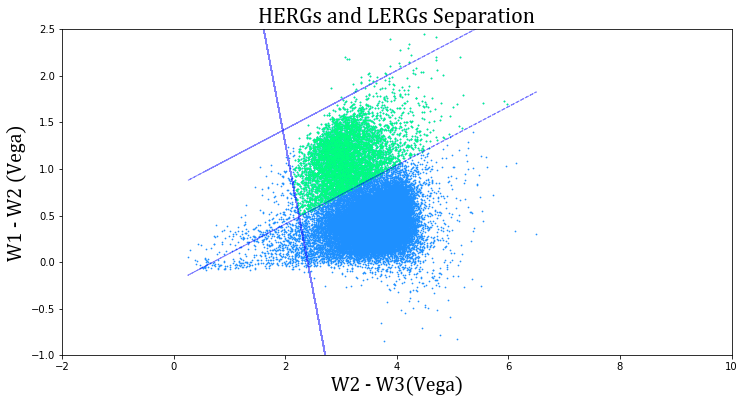

In [398]:
bsfont = {'fontname':'Cambria Math'}


f = plt.figure(figsize=(12,6))
plt.ylabel('W1 - W2 (Vega)', fontsize = 20,**bsfont)
plt.xlabel('W2 - W3(Vega)', fontsize=20,**bsfont)

plt.title('HERGs and LERGs Separation',fontsize=22,**bsfont)

plt.scatter(Tot_sources[:,3],Tot_sources[:,2],c='dodgerblue',s=0.5, label='LERGs')
plt.scatter(HERGs[:,3],HERGs[:,2],c='springgreen',s=0.5, label='LERGs')
plt.plot(Tot_sources[:,3],(0.315*Tot_sources[:,3]-0.222),linestyle="--",c='blue',lw=1,alpha=0.5)
plt.plot(Tot_sources[:,3],(0.315*Tot_sources[:,3]+0.796),linestyle="--",c='blue',lw=1,alpha=0.5)
plt.plot(Tot_sources[:,3],x2,linestyle="--",c='blue',lw=1,alpha=0.5)
plt.xlim(-2,10)
plt.ylim(-1.0,2.5)
plt.show()

In [373]:
L_low_f = HERGs[:,0]
Z = HERGs[:,1]
W12 = HERGs[:,2]
W34 = HERGs[:,4]
maj = HERGs[:,8]
zoo = HERGs[:,9]

nHERGs = np.vstack((L_low_f,Z,W12,W34,maj,zoo)).T

In [374]:
diff_14 = (W12*1.4)+3.2

def QSO(x,d1,d14,d2):
    qso = x[(d1 < d14) & (d2>0.7)]
    return array(qso)
QSO_tot = QSO(nHERGs,W34,diff_14,W12)

In [375]:
def RG(x,d1,d14):
    rg = x[(d1 >= d14)]
    return array(rg)
RG_tot = RG(nHERGs,W34,diff_14)

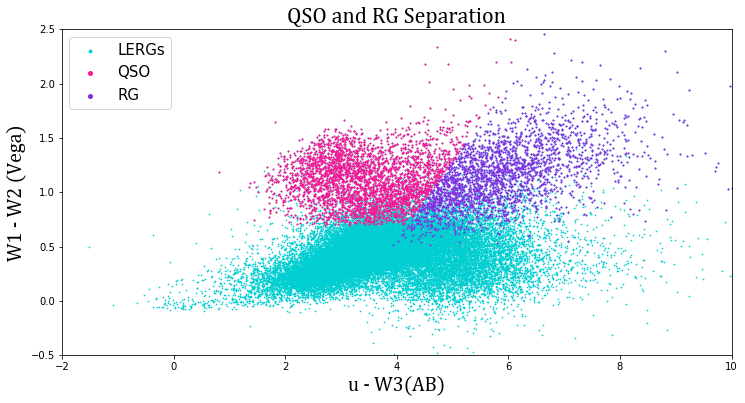

In [376]:
bsfont = {'fontname':'Cambria Math'}


f = plt.figure(figsize=(12,6))
plt.ylabel('W1 - W2 (Vega)', fontsize = 20,**bsfont)
plt.xlabel('u - W3(AB)', fontsize=20,**bsfont)

plt.title('QSO and RG Separation',fontsize=22,**bsfont)

plt.scatter(Tot_sources[:,4],Tot_sources[:,2],c='darkturquoise',s=0.5, label='LERGs')
plt.scatter(QSO_tot[:,3],QSO_tot[:,2],c='deeppink',s=1.0,label = 'QSO')
plt.scatter(RG_tot[:,3],RG_tot[:,2],c='blueviolet',s=1.0, label = 'RG')
plt.xlim(-2,10)
plt.ylim(-0.5,2.5)
plt.legend(loc=2, prop={'size': 15},markerscale=4)
#plt.savefig('magnitude relation.png')
plt.show()

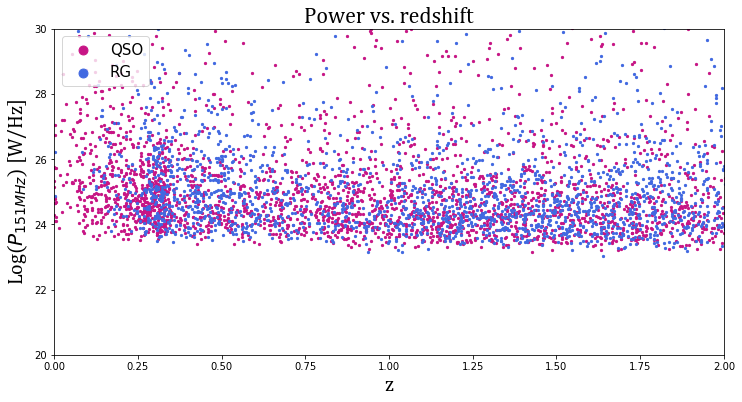

In [399]:
bsfont = {'fontname':'Cambria Math'}


f = plt.figure(figsize=(12,6))
plt.ylabel('Log($P_{151MHz}$) [W/Hz]', fontsize = 20,**bsfont)
plt.xlabel('z', fontsize=20,**bsfont)

plt.title('Power vs. redshift',fontsize=22,**bsfont)

plt.scatter(QSO_tot[:,1],np.log10(QSO_tot[:,0]),c='mediumvioletred',s=5,label = 'QSO')
plt.scatter(RG_tot[:,1],np.log10(RG_tot[:,0]),c='royalblue',s=5, label = 'RG')
plt.legend(loc=2, prop={'size': 15},markerscale=4)
plt.xlim(0,2)
plt.ylim(20,30)
plt.show()

In [401]:
P_QSO = QSO_tot[:,0]
z_QSO = QSO_tot[:,1]
maj_QSO = np.nan_to_num(QSO_tot[:,4])
lgz_QSO = np.nan_to_num(QSO_tot[:,5])

P_RG = RG_tot[:,0]
z_RG = RG_tot[:,1]
maj_RG = np.nan_to_num(RG_tot[:,4])
lgz_RG = np.nan_to_num(RG_tot[:,5])


In [403]:
for i in np.arange(len(maj_QSO)):
    if (lgz_QSO[i]==0):
        print (lgz_QSO)
    else:
        maj_QSO[i] = lgz_QSO[i]

[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.         39.33596014  0.         ...  0.          0.
  0.        ]
[ 0.  

In [406]:
for i in np.arange(len(maj_RG)):
    if (lgz_RG[i]==0):
        print (lgz_RG)
    else:
        maj_RG[i] = lgz_RG[i]

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0.

In [420]:
def Box(x,z,mn,mx,P,Mn,Mx,n):
    cat = x[(z >= mn) & (z <= mx) & (P >= Mn) & (P <= Mx)]
    return array(cat[:,n])

In [417]:
qso = np.vstack((P_QSO,z_QSO,maj_QSO,lgz_QSO)).T
rg = np.vstack((P_RG,z_RG,maj_RG,lgz_RG)).T

In [422]:
Box(qso,z_QSO,1.25,1.50,P_QSO,1e24,1e26,0).shape

(209,)

In [424]:
Box(rg,z_RG,1.25,1.5,P_RG,1e24,1e26,0).shape

(188,)